In [67]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})
import pandas as pd
#set max_colwidth to a None
pd.set_option('max_colwidth', None)

# Day 01: Part 1, ZTF Summer School 2021

### Michael Coughlin <cough052@umn.edu>

With contributions totally ripped off from Zjelko Ivezic and Mario Juric (UW), Gordon Richards (Drexel), Federica Bianco (U. Del), Maria Suveges (EPFL), and Gautham Narayan (UIUC)



## Logistics

* PROGRAM
    * Program: https://docs.google.com/spreadsheets/d/1lPpAk57tjSPB__RWVtTfvp6hMYDVFhl2Ri5JDcH7RxU/edit?usp=sharing
    * Abstracts and Speakers: https://docs.google.com/document/d/1HHVVuDY6jUiV6Bl-NBBGIdWZyK7qOBZsrn2c1uoLtvA/edit?usp=sharing
* WAYS TO REACH US
    * SLACK! ztfsummerschool.slack.com
    * GitHub: https://github.com/mcoughlin/ztf_summer_school_2021(everything course related goes here)
    * Email (ztf.summer.school@gmail.com): Good for official-ish messages like “I’m missing class.”
* WAYS TO GET HELP
    * Resources in the syllabus!
    * Facebook: Python Users in Astronomy
    * stackoverflow (can be toxic)

## RULES OF ENGAGEMENT

* Being able to explain a concept is the ultimate test of understanding, and it's entirely possible to believe we have an understanding right up to the moment we try to explain it to someone else.
* Therefore, asking questions during class is providing a service.
* No feigning surprise: To enable everyone to be comfortable saying "I don't understand", please resist the urge to act surprised when someone admits to not knowing something.
* No well-actually's: A well-actually happens when someone says something that's almost - but not entirely - correct, and you say, "well, actually..." and then give a minor correction. This is especially annoying when the correction has no bearing on the actual conversation.
* No subtle-isms: It goes without saying that overt expressions of racism, sexism, homophobia, transphobia or other biases are unacceptable. We also need to avoid subtle expressions of bias that can make others uncomfortable and that are of no benefit to the learning environment. For example, the expression "It's so easy my grandmother could do it" is a subtle-ism.

## SYLLABUS
* In-class work (synchronous)
* Homework (asyncronous). 
* We will not be tracking attendance or homework. You are (mostly) graduate students and therefore (presumably) want to be here.

## What are we here for?

By the end of this school, we hope you are able to formulate an appropriate analysis plan for a research question, select, gather and prepare (ZTF) data to answer it, and build a model to describe it.

* It’s quite likely that you will be the last generation of astronomers to use telescopes directly.
* We are moving from: The classical model - “What data do I have to collect to (dis)prove a hypothesis?” to the data-driven model - “What theories can I test given the data I already have?”

  <center> <img src ="./figures/cartoon.png" width="800"> </center>

## BUT THESE SURVEYS ARE MORE COMPLEX

* Ever increasing data volume and complexity- SDSS is ~30 TB; LSST will be one SDSS per night, or a total of >100 PB of data (40 billion objects)
* Sophisticated analysis, need for reproducibility - with the increasing data complexity, analysis becomes more complex, too; what do we do in case of disagreement?
* Open-source approach improves efficiency
   * we are not data starved any more!
   * the bottleneck for new results is in human resources and analysis tools
   * nobody has an unlimited budget; collaborate and share!

## Why github?

* Reproducibility
* Version control (git)
* Collaborative platform

## Why python?

* intuitive and readable
* open source
* support C integration for performance
* packages designed for science:
    * scipy
    * numpy
    * sklearn
    * matplotlib

## ASTRO DATA ANALYSIS CHALLENGES
* Large data volume (petabytes)
* Large numbers of objects (billions)
* Highly multi-dimensional spaces (thousands)
* Unknown statistical distributions
* Time-series data (irregular sampling)
* Heteroskedastic errors, truncated, censored and missing data
* Unreliable quantities (e.g. unknown systematics and random errors)

## NEW TO PYTHON?
* Mohit Sharma’s tutorial from Urban Computing Skills Lab: https://sharmamohit.com/work/tutorials/ucsl/
* Federica Bianco’s Python Bootcamp: https://github.com/fedhere/PyBOOT
* UW E-Science 2015 seminar on python: https://github.com/uwescience/python-seminar-2015
* Text reference: https://www.southampton.ac.uk/~fangohr/training/python/pdfs/Python-for-Computational-Science-and-Engineering.pdf

## More help with git/os commands/python in the help/ directory

<center> <img src ="./figures/git.png" width="800"> </center>

## CREATING / SYNCING FORK
* https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/syncing-a-fork
* git remote -v
* Check if my repo is already there! If not:
* git remote add upstream https://github.com/mcoughlin/ztf_summer_school_2021.git
* git fetch upsteam
* get checkout master
* git merge upstream/master
* git push origin master

# DATA

<center> <img src ="./figures/survey.png" width="800"> </center>

## WHAT ASTRONOMERS CAN MEASURE
* Angular separations
* Time differences
* Energy differences

###  That’s it.

## WHAT ASTRONOMERS CAN MEASURE
* Astrometry (angular position on the sky) - arcseconds
* Related definition: 1 parsec (pc) = distance at which a distance of 1 AU (i.e. Earth-Sun) subtends and angle of 1 arcsecond, i.e. 1 pc = 1 AU/tan(1”) ~ 31 trillion kilometers or 3.26 light years (ly)
* Photometry (how bright something is)
* Flux = photons (or energy in ergs)/sec/cm^2
* (Apparent) Magnitude = -2.5 log10(Flux) + const
* (Absolute) Magnitude = -2.5log10(Luminosity) + const = magnitude you’d measure if you could move the source to 10 pc
* Light curves = photometry vs time
* Evolution in source brightness either because of intrinsic (supernovae, AGN) or extrinsic (asteroids, eclipsing binaries)
* Spectroscopy = Energy vs wavelength/frequency
* Images/maps = Energy vs position on the sky (clustering, spatial correlation functions)
* Proper Motion = Astrometry vs time (e.g. stars, satellite galaxies, asteroids…)

<center> <img src ="./figures/spectrum.png" width="800"> </center>

<center> <img src ="./figures/images.png" width="800"> </center>

## Temporal & Spatial Variation

<center> <img src ="./figures/spatial_temporal.png" width="800"> </center>

## Spatial Variation

<center> <img src ="./figures/cmb.png" width="800"> <img src ="./figures/cmb_spectrum.png" width="800"> </center>

# ZTF Alerts and Filtering

This tutorial aims to give you an opportunity to explore the functionality of ZTFquery to get from ZTF observations to scientific objects. The content provided in this notebook draws from and builds on the tutorial material from Mickael Rigault (ztfquery.github.io).

##  ZTF night observations

As you may recall, ZTF surveys the entire Northern sky every three nights. We took at look at a data file describing the observations in the talk by Shreya Anand, and now we have a chance to play with data from one particular night.

In [68]:
from ztfquery import query
from astropy.time import Time
import numpy as np
%matplotlib inline

Does anyone recognize the days below (Hint: think of LIGO/Virgo)? Feel free to try other days.

In [69]:
zquery = query.ZTFQuery()
jdstart = Time("2019-04-25").jd
jdend = Time("2019-04-26").jd
zquery.load_metadata(sql_query=f"seeing<2 and obsjd BETWEEN {jdstart} AND {jdend}")

In [70]:
query_table = zquery.metatable
query_table

,ra,dec,infobits,field,ccdid,qid,rcid,fid,filtercode,pid,...,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,ipac_pub_date,ipac_gid
0,167.841034,-14.580353,0,318,16,3,62,2,zr,844140356215,...,168.292665,-14.152869,167.401740,-14.140647,167.387825,-15.006662,168.282152,-15.019243,2019-12-11 00:00:00+00,1
1,169.753946,-15.645640,0,318,11,2,41,2,zr,844140354115,...,170.204188,-15.214534,169.308928,-15.209621,169.301857,-16.075881,170.201174,-16.081070,2019-12-11 00:00:00+00,1
2,170.654505,-14.601988,0,318,15,4,59,2,zr,844140355915,...,171.099569,-14.167855,170.208359,-14.168581,170.207604,-15.035142,171.102176,-15.034246,2019-12-11 00:00:00+00,1
3,171.674526,-15.649168,0,318,10,2,37,2,zr,844140353715,...,172.120583,-15.213885,171.225276,-15.217096,171.226600,-16.083599,172.126013,-16.080530,2019-12-11 00:00:00+00,1
4,169.761466,-14.600939,0,318,15,3,58,2,zr,844140355815,...,170.208350,-14.168563,169.317023,-14.165775,169.313059,-15.032163,170.207530,-15.035125,2019-12-11 00:00:00+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31441,227.818947,3.165006,0,479,6,4,23,1,zg,844506452315,...,228.253201,3.597154,227.387075,3.599262,227.385021,2.732701,228.250162,2.730827,2020-12-09 00:00:00+00,2
31442,226.966147,7.864767,0,479,14,2,53,1,zg,844506455315,...,227.404801,8.296160,226.531591,8.299465,226.528451,7.432963,227.400018,7.429482,2020-12-09 00:00:00+00,2
31443,227.827823,5.949824,0,479,10,1,36,1,zg,844506453615,...,228.263882,6.381457,227.394414,6.384121,227.392138,5.517535,228.260602,5.515172,2020-12-09 00:00:00+00,2
31444,226.962272,6.998141,0,479,14,3,54,1,zg,844506455415,...,227.400053,7.429481,226.528467,7.432979,226.525584,6.566776,227.395385,6.563079,2020-12-09 00:00:00+00,2


/home/physical256/.local/lib/python3.8/site-packages/ztfquery/utils/tools.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([v[0]*np.cos(theta*_DEG2RA) - v[2]*np.sin(theta*_DEG2RA),
/home/physical256/.local/lib/python3.8/site-packages/ztfquery/utils/tools.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([v[0]*np.cos(theta*_DEG2RA) - v[2]*np.sin(theta*_DEG2RA),


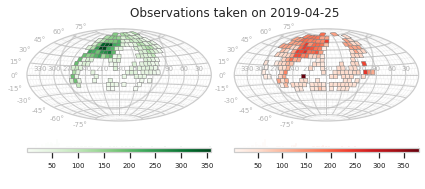

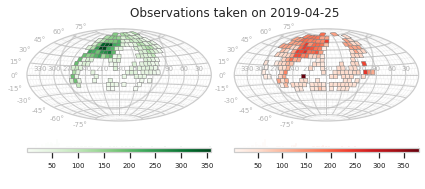

In [71]:
zquery.show_gri_fields(title="Observations taken on 2019-04-25", grid="main")

In [72]:
query_table.describe().to_csv("query_table.csv")

Now, select only the subset of observations from 2021-04-25 taken in g-band that are deeper 21st magnitude.

In [73]:
# YOUR CODE HERE
zquery = query.ZTFQuery()
jdstart = Time("2019-04-25").jd
jdend = Time("2019-04-26").jd
zquery.load_metadata(sql_query=f"seeing<2 AND obsjd BETWEEN {jdstart} AND {jdend} AND filtercode = 'zg' AND maglimit >= 21")

Display the results of your query below. How does your observations map change?

/home/physical256/.local/lib/python3.8/site-packages/ztfquery/fields.py:535: UserWarning: Only one color given, favor using show_fields() directly
  warnings.warn("Only one color given, favor using show_fields() directly")
/home/physical256/.local/lib/python3.8/site-packages/ztfquery/utils/tools.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([v[0]*np.cos(theta*_DEG2RA) - v[2]*np.sin(theta*_DEG2RA),


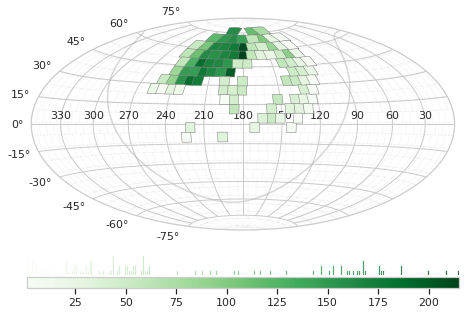

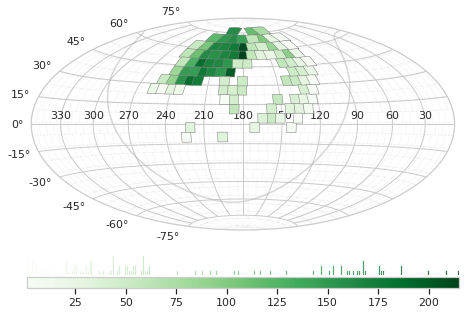

In [74]:
zquery.show_gri_fields(title='deep g-band observations')

Using the query table saved earlier, determine which field had the deepest limiting magnitude amongst all of the observations. Then plot a histogram of the variation in limiting magnitude across the $\textit{quadrants}$ and $\textit{observations}$ in that field as a fraction of the total number of observations.

In [77]:
#which field has biggest maglimit from query_table
query_table.groupby('field').maglimit.max().sort_values(ascending=False).head()
#query_table where field = 565
query_table_565 = query_table[query_table.field == 565]


Text(0.5, 0.98, 'maglimit histogram by quadrant and exptime')

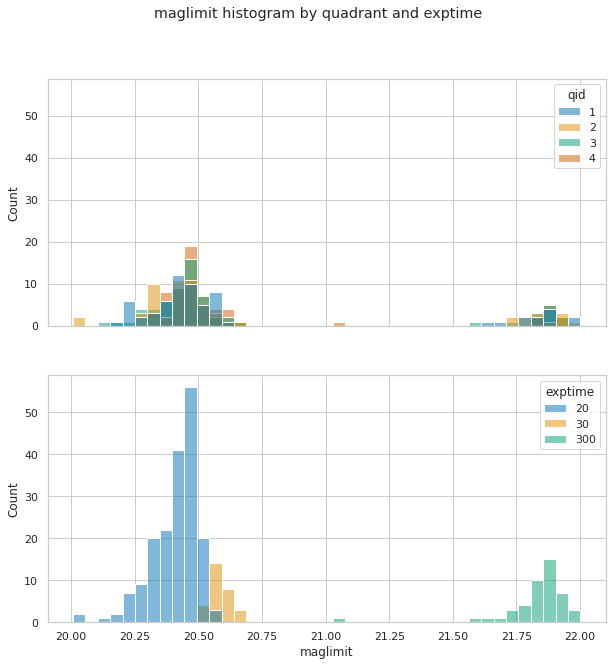

In [60]:
from matplotlib.pyplot import subplot
import seaborn as sns
import matplotlib.pyplot as plt
#plot histogram of maglimit with hue set by qid
# make 1 row 2 columns subplot
fig = plt.figure(figsize=(10,10))
ax1, ax2 = fig.subplots(2, 1, sharey=True,sharex=True)
#plot displot of maglimit with hue set by qid kind = hist on the first subplot
sns.histplot(data = query_table_565, x = 'maglimit', hue = 'qid', ax = ax1, palette='colorblind')
sns.histplot(data = query_table_565, x = 'maglimit', hue = 'exptime', ax = ax2, palette='colorblind')
plt.suptitle('maglimit histogram by quadrant and exptime')


Does this match your expectations? What explanations can there be for this observed limiting magnitude distribution?

Hint: To answer this question, check what exposure times were used during these observations.

In [ ]:
# YOUR CODE HERE

## Working with ZTF Alerts

ZTF alerts can be found here!
https://ztf.uw.edu/alerts/public/

We pulled down examples for you... but after class, please do explore.

In [62]:
from ztfquery import alert
ztfalert = alert.AlertReader.load('Data/2019_01_10_739260766315010006.avro')

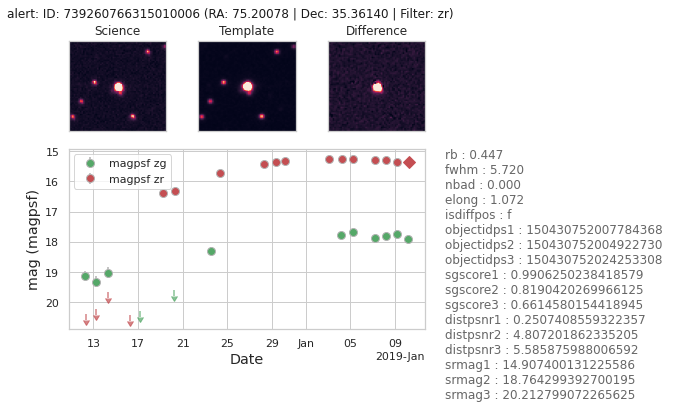

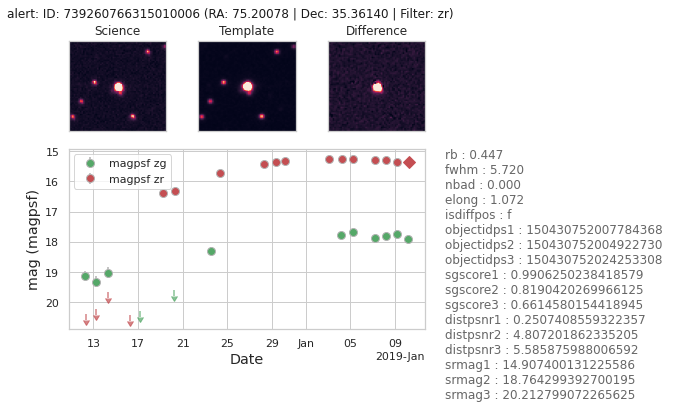

In [63]:
def get_stamp(self, which):
    """ return the HDUImage stamps for `which`.
    where `which` is one of the following ['Science','Template','Difference']
    """
    import gzip, io
    from astropy.io import fits
    with gzip.open(io.BytesIO(self.alert.get("cutout%s"%which)["stampData"]), 'rb') as f:
        return fits.open(io.BytesIO(f.read()),ignore_missing_simple=True)[0]
    
from types import MethodType
ztfalert.get_stamp = MethodType(get_stamp, ztfalert)
ztfalert.show()


Let's take a look at the alert contents. They are stored in ztfalert.alert as a dictionary of dictionaries.

In [64]:
ztfalert.alert

{'schemavsn': '3.2',
 'publisher': 'ZTF (www.ztf.caltech.edu)',
 'objectId': 'ZTF17aaacxxf',
 'candid': 739260766315010006,
 'candidate': {'jd': 2458493.7607639,
  'fid': 2,
  'pid': 739260766315,
  'diffmaglim': 20.550893783569336,
  'pdiffimfilename': 'ztf_20190110260752_000658_zr_c16_o_q4_scimrefdiffimg.fits',
  'programpi': 'Kulkarni',
  'programid': 1,
  'candid': 739260766315010006,
  'isdiffpos': 'f',
  'tblid': 6,
  'nid': 739,
  'rcid': 63,
  'field': 658,
  'xpos': 2469.45654296875,
  'ypos': 2918.46533203125,
  'ra': 75.2007803,
  'dec': 35.3613954,
  'magpsf': 15.371133804321289,
  'sigmapsf': 0.044493019580841064,
  'chipsf': 332.4355773925781,
  'magap': 15.316800117492676,
  'sigmagap': 0.005799999926239252,
  'distnr': 0.2712194621562958,
  'magnr': 14.318999290466309,
  'sigmagnr': 0.01600000075995922,
  'chinr': 0.7440000176429749,
  'sharpnr': 0.04699999839067459,
  'sky': 0.048080768436193466,
  'magdiff': -0.05433399975299835,
  'fwhm': 5.71999979019165,
  'classta

Which of the quantities provided here (on the side of the cutouts/lightcurve) do you think are most important in determining whether an alert is a real astrophysical transient or not?

Having an alert packet dictionary is quite useful in order to filter on certain criteria that we care about. For example, suppose we wanted to see only the photometry that was obtained as a part of the MSIP survey, we could filter on programid:

In [ ]:
# YOUR CODE HERE

For example, calculate the number of alerts from the MSIP data

In [ ]:
# YOUR CODE HERE

What percentage of alerts were generated from Partnership survey observations? What percentage have a real-bogus value greater than 0.5?

In [ ]:
alert_dict = ztfalert.alert
partnership_alerts = []
real_alerts = []
for alert in alert_dict['prv_candidates']:
    # YOUR CODE HERE
    pass

In [ ]:
partnership_alerts

In [ ]:
real_alerts

In [ ]:
print("%d percent of the alerts were generated from partnership observations." % (len(partnership_alerts)/len(alert_dict['prv_candidates'])*100))
print("%d percent of the alerts had RB scores greater than 0.5." % (len(real_alerts)/len(alert_dict['prv_candidates'])*100))

# Fritz candidate lightcurves and lightcurve properties

Our candidates are stored in a ZTF marshal database called Fritz. Now, we will retrieve an object and its respective properties from the Fritz marshal using ZTFQuery.

In [23]:
from ztfquery import fritz
source = fritz.download_source("ZTF19aadyppr", get_object=True)

In [24]:
source.fritzdict

{'ra_dis': None,
 'redshift_origin': None,
 'is_roid': False,
 'dec_dis': None,
 'redshift_history': [{'value': 0.0015,
   'set_at_utc': '2020-11-05T13:03:48.314811',
   'set_by_user_id': 22}],
 'score': 0.9999933242797852,
 'ra_err': None,
 'altdata': {'passing_alert_id': 1222285755315010004},
 'origin': None,
 'created_at': '2020-11-05T03:45:06.587069',
 'dec_err': None,
 'dist_nearest_source': None,
 'alias': None,
 'modified': '2022-07-16T15:06:15.342984',
 'offset': 0.0,
 'mag_nearest_source': None,
 'healpix': 775994328883373900,
 'ra': 202.4267435,
 'redshift': 0.0015,
 'e_mag_nearest_source': None,
 'internal_key': '6e38a85b-a356-4ba3-9b5e-9777a2aaaa69',
 'dec': 47.1879649,
 'redshift_error': None,
 'transient': False,
 'detect_photometry_count': None,
 'id': 'ZTF19aadyppr',
 'varstar': False,
 'followup_requests': [],
 'assignments': [],
 'duplicates': None,
 'annotations': [],
 'classifications': [],
 'gal_lat': 68.57917779137746,
 'gal_lon': 104.9162956084081,
 'luminosity_d

As you can see from the JSON dictionary, the source classification is simply "transient". Print the luminosity distance, and distance modulus from the JSON dict. What two groups did this transient belong to?

In [ ]:
# YOUR CODE HERE

A: The transient belongs to both "Redshift Completeness Factor" program as well as the "Census of the Local Unverse" program, satisfying the filtering criteria of both.

Now, let us take a closer look at the lightcurve of this transient.

In [ ]:
fritz_lc = fritz.FritzPhotometry.from_name("ZTF19aadyppr", force_dl=True)

In [ ]:
fritz_lc.store()

In [ ]:
fritz_lc.show()

The lightcurve will be written to a file in the ZTFDATA directory we had created earlier, by default.

In [ ]:
import os
os.listdir(os.path.join(fritz.FRITZSOURCE,"lightcurve"))
           

In [ ]:
from astropy.io import ascii
from astropy.table import Table
fname = os.path.join(fritz.FRITZSOURCE,"lightcurve")+"/fritz_lightcurve_ZTF19aadyppr.csv"
phot_table = Table(ascii.read(fname, format='csv'))
phot_table

In case downloading the lightcurve from ztfquery does not work, we have the lightcurve stored already in the data directory.

In [ ]:
from astropy.io import ascii
from astropy.table import Table
fname = 'data/fritz_lightcurve_ZTF19aadyppr.csv'
phot_table = Table(ascii.read(fname, format='csv', comment="#"))

Now, plot this lightcurve from the fritz_lc JSON dictionary, with a few modifications: 1) show the lightcurve upto 200 days 2) change x-axis to days from peak, 3) add absolute magnitude on the secondary y-axis 4) add a legend for different filters (and change the color-coding if you please!) 5) plot with grid 6) exclude the non-detections

In [ ]:
# YOUR CODE HERE

Now looking at your lightcurve, what kind of object do you think it is? Could it be a core-collapse supernova of some subtype? If not, what other types of transients live in this luminosity-space?

# Bayesian Inference

## Statistical inference is a logical framework with which to test our beliefs of a noisy world against data.
### We formalize our beliefs in a probabilistic model.

# AXIOMS OF PROBABILITY

## SOME KEY IDEAS
* All of the data we collect include some degree of randomness
* Any conclusions we draw must therefore incorporate some notion of uncertainty
* There is a a correct answer - the Universe as we know it exists after all.
* Theory gives us a useful model for it. The challenging is evaluating how likely that model is given the data
* Data are constants.
* Even if they were randomly generated by the Universe, the data that we have already collected are fixed numbers.
* We describe things we don't know with perfect precision as "random"

## RANDOM VARIABLES

<center> <img src ="./figures/cartoon_probability.png" width="800"> </center>

<center> <img src ="./figures/random_variables.png" width="800"> </center>

## Random Variables

* Discrete:
   * Spectral type (G2V, KIII)
   * Galaxy type, galaxy zoo
* Continuous:
   * magnitude, flux, colour, radial velocity, parallax/distance, temperature, elemental abundances, magnetic field, age, etc...

# Statistical inference is a logical framework with which to test our beliefs of a noisy world against data.

## We formalize our beliefs in a probabilistic model.

## THE MULTIVARIATE CASE

<center> <img src ="./figures/2D.png" width="800"> </center>

<center> <img src ="./figures/marginal.png" width="800"> </center>

## Bayes

<center> <img src ="./figures/bayes.png" width="800"> </center>

* Posterior Likelihood: How probable is the hypothesis given the data we observed
* Prior: How probable was the hypothesis before we observed anything
* Likelihood: How probable is the data given the hypothesis is true
* Evidence: How probable is the data over all possible hypotheses

## In-class Warm-up
* Download this file (too big for git!): https://bit.ly/38PDnGy
   * Use h5py to look at this data - h5py.File() to open, and then use the keys() method to find what elements are store
   * You want “chain” and then “position”
* Use numpy to get the stored data as an array
* Use matplotlib to visualize this point cloud (CAREFUL)
* Use pandas to convert the first two columns of the numpy array to a dataframe
* Use seaborn’s jointplot to visualize this dataframe (try hex, or a kde with every 100th sample)
* Use pandas to convert the first two columns of the numpy array to a dataframe (maybe you should make the above a function) and again plot every 100th point with a low alpha using matplotlib
* Remember our goal is to infer a hypothesis from data i.e. P(H|D)
* Estimate the means and standard deviations in both x and y by eye
* Now use scipy.stats.multi_variate normal to construct a distribution object in python and overlay it with matplotlib (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html)
* Finally, see how well your eyeball estimate matches astroML.stats.fit_bivariate_normal

# The Likelihood Function

If we know the distribution from which our data were drawn (or make a hypothesis about it), then we can compute the **probability** of our data being generated.

For example, for the Gaussian distribution probablity of getting a specific value of $x$ is given by:

## $$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

### The Likelihood Function

If we want to know the total probability of our *entire* data set (as opposed to one measurement) then we must compute the *product* of all the individual probabilities:

## $$L \equiv p(\{x_i\}|H(\theta)) = \prod_{i=1}^n p(x_i|H(\theta)),$$

where $H$ refers to the *hypothesis* and $\theta$ refers collectively to the $k$ parameters of the model, which can generally be multi-dimensional. 


In words, this is ***the probability of the data given the model parameters***. 

Note that this implicitly assumes that the measurements in your sample are, as always, i.i.d


Recall (from the axioms of probability) that:

## $$ P(A \cap B)  = P(A|B)\cdot P(B) = P(B|A)\cdot P(A)$$
and iff:
## $$ P(A \cap B) = P(A) \cdot P(B) $$ then $A$ and $B$ are **independent**.



We can write this out as:
### $$L = \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$

This can simplify to
### $$L = \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right),$$

where we have written the product of the exponentials as the exponential of the sum of the arguments, which will make things easier to deal with later.

i.e. we have done this: 
### $$\prod_{i=1}^n A_i \exp(-B_i) = (A_iA_{i+1}\ldots A_n) \exp[-(B_i+B_{i+1}+\ldots+B_n)]$$

The argument of the exponential is just

### $$\exp \left(-\frac{\chi^2}{2}\right).$$

where, for our Gaussian distribution
### $$\chi^2 = \sum_{i=1}^n \left ( \frac{x_i-\mu}{\sigma}\right)^2.$$

At some specific values of the model parameters, $\theta$, we can evaluate the likelihood of our data, given the model (you did this with the sum of squared residuals) i.e 

### $$p(D | \theta)$$

**Note**

For multidimensional distributions, as we will see later in the course, the uncertainties come in the form of a covariance matrix where there uncertainties can be correlated. This still assumes Gaussianity

## $$ L = p(D\; | \;  \pmb \theta\;) =  \prod_{k=1}^{n} \; \frac{1}{(2\pi)^{d/2} \; |\Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]$$

where $\Sigma$ is the covariance matrix and $d$ is the dimensionality

For practical reasons, it's better to work with the natural logarithm of the likelihood (we'll get to why in a few slides)

We define the *log-likelihood function* as ${\rm lnL} = \ln[L(\theta)]$.  The maximum of this function happens at the same place as the maximum of $L$. Given all that, we have:

## $${\rm lnL} = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

We then determine the maximum in the same way that we always do.  It is the parameter set for which the derivative of ${\rm lnL}$ is zero:

$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} \equiv 0.$$

That gives $$ \sum_{i=1}^N \frac{(x_i - \hat \mu)}{\sigma^2} = 0.$$

(note: we should also check that the $2^{\rm nd}$ derivative is negative, to ensure this is the *maximum* of $L$)

(also note: any constants in $\ln L$ disappear when differentiated, so constant terms can typically be ignored.)

So, maximizing the likelihood is the same as minimizing $\chi^2$:

Maximizing the likelihood is solving for the extremum of:
### $$ L \sim \exp \left(-\frac{\chi^2}{2}\right).$$

is the same as Maximizing the natural logarithm of the likelihood:
(because the log is a monotonically increasing function)

### $$ \ln (L) \sim -\frac{\chi^2}{2}$$

and therefore is the same as **minimizing** the negative log likelihood:

### $$ -\ln(L) \sim \frac{\chi^2}{2}$$


i.e. maximum likelihood estimation - and $\chi^2$ minimization are just a special case of M-estimators. 

Since $\sigma = {\rm constant}$, that says 
## $$\sum_{i=1}^N x_i = \sum_{i=1}^N \hat \mu = N \hat \mu.$$

Thus we find that
## $$\hat \mu = \frac{1}{N}\sum_{i=1}^N x_i,$$
which is just the arithmetic mean of all the measurements.

### Parameter Uncertainties

Whether frequentist or Bayesian, the maximum likelihood "point estimate" is only a small part of the picture. What we're really interested in scientifically is the *uncertainty* of the estimates. So simply reporting a point estimate is not appropriate.

In frequentist approaches, "error bars" are generally computed from *Confidence Intervals*, which effectively measure $P(\hat\theta\mid\theta)$, rather than $P(\theta\mid D)$.
It takes some mental gymnastics to relate the confidence interval to the quantity we as scientists have in mind when we say "uncertainty".

In the Bayesian approach, we are actually measuring $P(\theta\mid D)$ from the beginning.

For some approachable reading on frequentist vs. Bayesian uncertainties, I'd suggest [The Fallacy of Placing Confidence in Confidence Intervals](http://learnbayes.org/papers/confidenceIntervalsFallacy/), as well as Jake's (rather opinionated) blog post on the topic, [Confidence, Credibility, and why Frequentism and Science do not Mix](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/).

### Aside - the denominator in Bayes' rule


The denominator in Bayes' rule is the Evidence $P(D)$

# $$ P(H|D) = \frac{P(D|H) \cdot P(H)}{P(D)} $$

Consider that the evidence can be expressed as an integral using the identities we covered above:
$$
P(D) = \int P(D\mid\theta) P(\theta) d\theta
$$

In other words, it is the integral over the likelihood for *all possible values of theta*.

This means we could have called the Fully Marginalized Likelihood (FML) instead of the evidence. 

When your likelihood is a complicated function of many parameters, computing this integral can become extremely costly (a manifestation of the *curse of dimensionality*), which makes the acronym doubly appropriate in any situation where you actually need it.


In general, for **model fitting**, you can ignore the FML as a simple normalization term. In **model selection**, the FML can become important.

## The liklihood function then has to play a dual role:
    
Given a fixed set of model parameters ($\theta = \theta_0$) it is evaluating how likely the data you observed is.


But, you can also consider the likelihood to be a function of the model parameters, given fixed data.

You cast the likelihood as a function you evaluated at a range of model parameter values.

You'll also have to do this on your homework, except now you've got more than 1 parameter.

### Confidence Interval vs. Credible Region

Even with a flat uniform prior, the two approaches **are not the same.**

In the **frequentist paradigm**, the meaning of the *confidence interval* $\mu_0 \pm \sigma_{\mu}$ is 
the interval that would contain the true $\mu$ (from which the data were drawn) in 68% cases
of a large number of imaginary repeated experiments (each with a different N values of $\{x_i\}$). 

The same interval follows from the **Bayesian approach** with uniform priors.
However, the meaning of that so-called *credible region* is *fundamentally different*: it is the interval
that contains the true $\mu$ with a probability of 68%, given the given dataset (our dear one and only 
dataset - there are no imaginary experiments in Bayesian paradigm). 

This credible region is the relevant quantity in the context of scientific measurements. 

### The Essence of the Bayesian Method 

The basic premise of the Bayesian method is that probability statements are not limited to data, 
but can be made for model parameters and models themselves. Inferences are made by producing 
probability density functions (pdfs); most notably, **model parameters are treated as random variables**.

# In class exercise:

Seeing the drawback of an MLE approach, when you fail to incorporate prior information is easy.

Let's do it with some example data:

In [ ]:
# some imports we need
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

import scipy.stats as st
import numpy as np
import scipy.integrate as si

In [ ]:
### Let's draw a homoscedastic sample of {x_i} from a Gaussian and see what happens with L
# first generate a sample of N points drawn from N(mu,sigma):

np.random.seed(42)
sampleSize=100
mu = 1.0
sigma = 0.2 
sample = st.norm(mu, sigma).rvs(sampleSize) 

# now compute likelihoods for each point using true mu 
muGrid = np.linspace(0,2,1000)
likelihood = np.ones(len(muGrid))

# what's the total likelihood and where is the maximum likelihood
for i in sample:
    this_L = st.norm(i, sigma).pdf(muGrid)
    plt.plot(muGrid, this_L, alpha=0.1)
    likelihood*=this_L

# renormalize the total area
likelihood /= si.trapz(likelihood, muGrid)

# plot the likelihood
plt.plot(muGrid, likelihood, lw=2, color='DodgerBlue', ls='-.', label='Total likelihood from samples')
  
    
# plot the truth for comparison
# you should be able to change the sample size in the above cell 
# and see the total likelihood get sharper as the sample size increases
# you can even verify that the standard deviation scales as sqrt(N)

truth = st.norm(1, sigma).pdf(muGrid)
plt.plot(muGrid, truth, 'k:', lw=4, label='Truth')
plt.legend(frameon=False)

print("Maximum likelihood at {:.3f}".format(muGrid[likelihood.argmax()]))

In [ ]:
# now what happens if I tell you that mu>=0.99?
muMin = 0.99


# draw sample as before
np.random.seed(42)
sampleSize=10
mu = 1.0
sigma = 0.2 
sample = st.norm(mu, sigma).rvs(sampleSize)

# lets clip samples to be greater than 0.99
sample = np.clip(sample, muMin, None)


likelihood = np.ones(len(muGrid))
# what's the total likelihood and where is the maximum likelihood
for i in sample:
    this_L = st.norm(i, sigma).pdf(muGrid)
    plt.plot(muGrid, this_L, alpha=0.1)
    likelihood*=this_L

# renormalize the total area
likelihood /= si.trapz(likelihood, muGrid)

# save a copy of this for the next step
likelihood_no_prior = likelihood

plt.plot(muGrid, likelihood, lw=2, color='DodgerBlue', ls='-.', label='Total likelihood from samples')
plt.axvline(muMin, color='grey', label=f'muMin = {muMin:0.2f}')
plt.legend(frameon=False)



In [ ]:
# now what happens if I tell you that mu>=0.99?
muMin = 0.99

# draw sample as before
np.random.seed(42)
sampleSize=3
mu = 1.0
sigma = 0.2 
sample = st.norm(mu, sigma).rvs(sampleSize)

# lets clip samples to be greater than 0.9
sample = np.clip(sample, muMin, None)


likelihood = np.ones(len(muGrid))
posterior  = np.ones(len(muGrid))

# now lets incorporate a prior
prior = np.ones(len(muGrid))
prior[muGrid < muMin] = 0.


# what's the total likelihood and where is the maximum likelihood
for i in sample:
    this_L = st.norm(i, sigma).pdf(muGrid)   
    plt.plot(muGrid, this_L, alpha=0.1)
    likelihood*=this_L
    posterior *= (this_L*prior)

    
# renormalize the total area
posterior /= si.trapz(posterior, muGrid)
# renormalize the total area
likelihood /= si.trapz(likelihood, muGrid)

plt.plot(muGrid, prior, lw=2, color='orange', ls=':', label='Prior')
plt.plot(muGrid, posterior, lw=2, color='Crimson', ls='-', label='Posterior from samples')
plt.plot(muGrid, likelihood, lw=2, color='DodgerBlue', ls='-.', label='Total likelihood from samples')

plt.axvline(muMin, color='grey', label=f'muMin = {muMin:0.2f}')
plt.legend(frameon=False)



## Notice that the shape of the likelihood and posterior distributions is now quite different

## with a large number of samples, this difference should be minimized... but sometimes you don't get lucky enough to get a large number of samples and still have to account for some sort of selection effect.

## Here we're seeing how the distributions look different. In the homework today, you'll quantify how the two different frameworks can differ *quantitatively*.

# Recap

* We talked about a frequentist vs Bayesian view of the Universe 
    * frequentist confidence intervals on estimators from a sample vs.
    * Credible regions for the model (meaningless for a frequentist)
* The central role of the likelihood function to both statistical frameworks
* How incorporating prior information causes frequentists and Bayesians to disagree very fundamentally about what "truth" is

# Statistical Frameworks

Goals:

* Explore the relationship between "characterizing the posterior PDF" and "fitting a model to data."

* Understand how to derive maximum likelihood estimators and their confidence intervals

* Be able to compare, contrast and appreciate the Bayesian and Frequentist approaches to statistics

We'll work through a simple Bayesian inference (fitting a straight line and reporting summaries of marginalized posterior PDFs), and then compare with the frequentist procedure of _estimating_ the gradient and intercept and reporting confidence intervals.

# <center> We've only known our Universe is expanding for ~91 years </center>

# Proper motion gives us distances to stars in our own Galaxy from geometry
<center> <img src="./figures/proper_motion.png" width="20%"></center>

You've already seen that stars in our galaxy have different proper motions in homework 01.

## <center> You've also seen that we can measure the brightness of stars (HW 2) </center>

## All stars vary if you look long enough. Some actually pulsate.

<img src='./figures/rspuppis.gif'>

<img src="./figures/hubble_mtwilson.jpg" width="50%">

<img src="./figures/HubbleCepheid.jpg">

<img src="./figures/hubblenotebk.jpg">

## The period-magnitude relation in Cepheid stars

* Cepheids are stars whose brightness oscillates with a stable period the logarithm of which appears to be strongly correlated with their mean luminosity (or absolute magnitude).
<img width="512" src="./figures/Cepheid-variabledb92-600x461.jpg">

## Why does this make them useful

* A lot of _monitoring_ data - repeated imaging and subsequent "photometry" of the star - can provide a measurement of the period of the oscillation and their apparent magnitudes

* If you can do this in our Galaxy, you can compare apparent magnitudes to distances from parallax and find a relation - this relation involves the period of the Cepehids. You can therefore define some mean corrected apparent magnitude and together with the distance, you can derive an *absolute magnitude*

* If you measure Cepehids in other galaxies (too far away for parallax distances) then you can assert that those Cepheids are the same as the ones in our Galaxy and therefore have the same absolute magnitude - so now you can get the distances to those galaxies

<img src="./figures/hubble_diagram.jpg" width="80%">

<img src="./figures/hubblefindsu.jpg">

<img src="./figures/distance_ladder.jpg">

* Let's look at some Cepheid measurements reported by [Riess et al (2011, R11)](https://arxiv.org/abs/1103.2976).  The data are in the form of datapoints, one for each star.

* The periods are well measured (how??? we'll get there!), while the magnitudes come with reported error bars.

<img src="./figures/cepheid_data.png" width=100%>

## The model, and the data

* Let's assume that Cepheid stars' luminosities are related to their oscillation periods by a power law, such that their apparent magnitude and log period follow the linear relation

$\;\;\;\;\;\;\;m = a\;\log_{10} P + b$

* The data consist of *observed magnitudes with quoted uncertainties*, such as: 

$\;\;\;\;\;\;\;m^{\rm obs} = 24.51 \pm 0.31$ at $\log_{10} P = \log_{10} (13.0/{\rm days})$

## Bayesian inference

* We compute the posterior PDF for the parameters $a$ and $b$ given the data and the assumed model $H$: 

$\;\;\;\;\;P(a,b|\boldsymbol{m}^{\rm obs},H) \propto P(\boldsymbol{m}^{\rm obs}|a,b,H)\;P(a,b|H)$

* We can evaluate the unnormalized posterior PDF on a grid, renormalize it numerically, and then visualize and summarize the resulting 2D function.

## Building an inference

We'll need:

* The sampling distribution: $P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},H)$

* The conditional PDF for the latent variables $m_k$, $P(m_k|a,b,\log_{10}{P_k},H)$

* A prior PDF for our parameters: $P(a,b|H)$

## The sampling distribution $P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},H)$

We were given points ($m^{\rm obs}_k$) with error bars ($\sigma_k$), which suggests a *Gaussian* sampling distribution for each one:

$\;\;\;\;\;\;\;P(m^{\rm obs}_k|m_k,\sigma_k,H) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp{-\frac{(m^{\rm obs}_k - m_k)^2}{2\sigma_k^2}}$

> Note that we are never _given_ the form of the sampling distribution: it always has to be assumed. 

> A Gaussian will turn out to be a good choice in a number of cases where the problem has some true "variance" or dispersion ($\sigma$) - even if you don't know what that is, because of a principle called maximum entropy. This sort of setting is common in the real world (see the Central Limit Theorem) and maximizing the entropy minimized the amount of prior information built into the posterior distribution.

If we assume that the measurements of each Cepheid start are *independent* of each other, then we can define *predicted and observed data "vectors"* $\boldsymbol{m}$ and $\boldsymbol{m}^{\rm obs}$ (plus a corresponding observational uncertainty "vector" $\boldsymbol{\sigma}$) and compute the joint sampling distribution as:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\boldsymbol{\sigma},H) = \prod_k P(m^{\rm obs}_k|m_k,\sigma_k,H)$

## The log likelihood

Taking logs, for numerical stability, the product in the joint likelihood becomes the following sum:

$\;\;\;\;\;\;\;\log P(\boldsymbol{m}^{\rm obs}|a,b,H) = \sum_k \log P(m^{\rm obs}_k|(a\log{P_k} + b),\sigma,H)$

which, substituting in our Gaussian form, gives us: 

$\;\log P(\boldsymbol{m}^{\rm obs}|a,b,H) = -\frac{1}{2}\sum_k \log{2\pi\sigma_k^2} - \frac{1}{2} \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

> Note that the log likelihood $\log P(\boldsymbol{m}^{\rm obs}|a,b,H)$ is a function, $\log \mathcal{L}(a,b;\boldsymbol{m}^{\rm obs})$ that can be evaluated, as a function of $a$ and $b$, at constant $\boldsymbol{m}^{\rm obs}$

## The Chi-squared misfit statistic

Astronomers often call the term in the log likelihood that depends on the parameters $\chi^2$ ("chi-squared"):

$\;\;\;\;\;\;\;\chi^2 = \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

$\chi^2$ is a "misfit" statistic, that quantifies the difference between "observed and predicted data." Under our assumptions, it's equal to -2 times the log likelihood (up to a constant). The "predicted data" are $m_k = a\log{P_k} - b$

## Including the prior $P(a,b|H)$

* Let's assume  the prior PDFs for $a$ and $b$ to be independent, such that $P(a,b|H) = P(a|H)P(b|H)$.

* For now, let's assume uniform prior PDFs for both $a$ and $b$, supposing that we know roughly what size they are:

$\;\;\;\;\;\;\;P(a|H) = \frac{1}{a_{\rm max} - a_{\rm min}}$ with $(a_{\rm min}, a_{\rm max}) = (-10, 10)$

$\;\;\;\;\;\;\;P(b|H) = \frac{1}{b_{\rm max} - b_{\rm min}}$ with $(b_{\rm min}, b_{\rm max}) = (10, 30)$

* This is literally what you've been doing by evaluating on a grid of points

## Putting it all together

The joint PDF is:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs},a,b|H) = P(\boldsymbol{m}^{\rm obs}|a,b,H) P(a|H) P(b|H)$

> Since we marginalized out the $m$, analytically, we _could_ have drawn the PGM more simply, jumping directly to $P(\boldsymbol{m}^{\rm obs}|a,b,H)$. However, it's often helpful to _explicitly_ distinguish between "true" parameters and latent ones.

## Characterizing the posterior PDF

With the completed factorization of the joint PDF for all variables, we have the following product: 

$\;\;P(a,b|\boldsymbol{m}^{\rm obs},H) \propto P(\boldsymbol{m}^{\rm obs}|a,b,H) P(a|H) P(b|H)$

We can evaluate the posterior PDF $P(a,b|\boldsymbol{m}^{\rm obs},H)$ for any choice of parameters $(a,b)$, up to a normalization constant.

## Posterior Evaluation on a Grid

* Our 2-D posterior PDF can be visualized as a contour plot

* We can choose contours that display the _credible regions_ that enclose 68% and 95% of the posterior probability.

* _Given our assumption that the model is true, the probability that the true values of the model parameters lie within the 95% credible region given the data is 0.95._

<img src="./figures/cepheids_2d-posterior.png" width=60%>

## Summarizing our inferences

* Typically, we will want to (or will be expected to) report "answers" for our model parameters

* This can be difficult: our result _is_ the posterior PDF for the model parameters given the data!

* A convenient, and in this case appropriate, choice is to report quantiles of the 1D marginalized PDFs

> In general, the most important thing when summarizing inferences is to state clearly what you are doing, preferably with critical commentary

## 1D marginalized posterior PDFs

<img src="./figures/cepheids_1d-posteriors.png">

Let's define the 68% credible interval as the range between the 16th and 84th percentile, and quote it as an (asymmetric) "error bar" on the 1-D posterior medians:

$a = -2.95^{+0.06}_{-0.06} \;\;\;\;\;\;\; b =  26.27^{+0.09}_{-0.1} $

## Notes on summaries of marginal PDFs 

* In this simple case, our report makes sense: the medians of both 1D marginalized PDFs lie within the region of high 2D posterior PDF. *This will not always be the case.*


* The marginalized 1-D posterior for $x$ has a well-defined meaning, regardless of the higher dimensional structure of the joint posterior:  it is $P(x|d,H)$, the PDF for $x$ given the data and the model, and *accounting for the uncertainty in all other parameters*.


* The posterior PDF we computed is close to, but not quite, a bivariate Gaussian. 

**Question: What choice of (proper) prior would we have had to make in order for the posterior PDF to be _exactly_ Gaussian?**

## Post-inference model checking


It's always a good idea to check that the inferred parameter values are sensible: look at the model predictions in data space.

$\longrightarrow$ Let's overlay the model period-magnitude relation defined by the 1-D posterior median parameter values on the data.

<img src="./figures/cepheids_posterior-median-check.png">

## "Fitting the data"

* The Bayesian solution is not a single set of "best-fit" parameters. 

* We can think of the posterior PDF as providing us with a continuous distribution of model fits that are _plausible_ given the data and our assumptions.

* There are other ways of defining the parameters that _best fit_ the data: the primary one is "the method of Maximum Likelihood"

## Computing the Bayesian Posterior PDF

Here's how the figures for the Bayesian inference were made - starting with the functions for the log likelihood, the log prior, and the unnormalized log posterior, evaluated on a 2D $(a,b)$ parameter grid given the R11 data.

In [ ]:
exec(open('cepheids.py').read())
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)

data = Cepheids('data/R11ceph.dat')

def log_likelihood(logP, mobs, sigma, a, b):
    return -0.5*np.sum(2*np.pi*sigma**2) - \
            0.5*np.sum((mobs - a*logP - b)**2/(sigma**2))

def log_prior(a, b):

    amin,amax = -10.0,10.0
    bmin,bmax = 10.0,30.0

    if (b > bmin)*(b < bmax):
        value = 0.0
# Interesting alterniative: Cauchy distribution for b, equivalent to uniform
# in angle of orientation of line:
#        value = np.log(1.0/(bmax-bmin)) - \
#                np.log(np.pi) - np.log(1 + a**2)
    else:
        value = -np.inf
    
    if (a > amin)*(a < amax):
        value += 0.0
    else:
        value += -np.inf
        
    return value

def log_posterior(logP, mobs, sigma, a, b):
    return log_likelihood(logP,mobs,sigma,a,b) + log_prior(a,b)

## Evaluating the posterior PDF

Now, let's set up a suitable parameter grid, evaluate the unnormalized log posterior on it, and then renormalize it numerically.

In [ ]:
# Limits of parameter grids, focused on the high likelihood region:
amin, amax = -3.4, -2.4
bmin, bmax = 25.7, 26.8
limits = (amin, amax, bmin, bmax)

def evaluate_posterior_on_a_grid(limits, NGC_ID=4258, npix=100):
    
    # Make grids:
    amin, amax, bmin, bmax = limits
    agrid, bgrid, logprob = np.linspace(amin,amax,npix), np.linspace(bmin,bmax,npix), np.zeros([npix,npix])

    # Select a Cepheid dataset:
    data.select(NGC_ID)

    # Loop over parameters, computing unnormlized log posterior PDF:
    for i,a in enumerate(agrid):
        for j,b in enumerate(bgrid):
            logprob[j,i] = log_posterior(data.logP, data.mobs, data.sigma, a, b)

    # Exponentiate and normalize to get posterior density:
    prob = np.exp(logprob - np.max(logprob))
    prob /= np.sum(prob)
    
    return prob, agrid, bgrid

In [ ]:
%%time
prob, a, b = evaluate_posterior_on_a_grid(limits, NGC_ID=4258, npix=100)

## Visualizing the 2D PDF

* Typically we want to be able to see the centroid, size and shape of the posterior PDF

* In particular we want to see the _credible regions_ that enclose 68% and 95% of the posterior probability. These are best plotted as contours

* Given our assumption that the model is true, the probability that the true values of the model parameters lie within the 95% credible region given the data is 0.95

In [ ]:
sorted = np.sort(prob.flatten())
C = sorted.cumsum()

# Find the pixel values that lie at the levels that contain 68% and 95% of the probability:
lvl68 = np.min(sorted[C > (1.0 - 0.68)])
lvl95 = np.min(sorted[C > (1.0 - 0.95)])

plt.figure(figsize=(10,10))
plt.imshow(prob, origin='lower', cmap='Blues', interpolation='none', extent=limits)
plt.contour(prob,[lvl95,lvl68],colors='black',extent=limits)
plt.grid()
plt.xlabel('slope a', fontsize=20)
plt.ylabel('intercept b / AB magnitudes', fontsize=20);

# plt.savefig("cepheids_2d-posterior.png");

## Summarizing our inferences

Let's compute the 1D marginalized posterior PDFs for $a$ and for $b$, and report the median and "68% credible interval" (defined as the region of 1D parameter space enclosing 68% of the posterior probability).

In [ ]:
prob_a_given_data = np.sum(prob, axis=0) # Approximate the integral as a sum
prob_b_given_data = np.sum(prob, axis=1) # Approximate the integral as a sum

# Check that we do have a 1D PDF:
# print(prob_a_given_data.shape, np.sum(prob_a_given_data))

plot_1d_marginalized_pdfs(a, b, prob_a_given_data, prob_b_given_data)

# plt.savefig("cepheids_1d-posteriors.png")

print("a = ",compress_1D_pdf(a, prob_a_given_data, ci=68, dp=2))
print("b = ",compress_1D_pdf(b, prob_b_given_data, ci=68, dp=2)) 

## Post-inference model checking


Are these inferred parameters sensible? 

In [ ]:
data.plot(4258)

data.overlay_straight_line_with(a=-2.95, b=26.25, label='Model')

data.add_legend()

# plt.savefig("cepheids_posterior-median-check.png")

# Curse of Dimensionality

![Curse of Dimensionality](figures/ndim.png)

In general, evaluating the posterior throughout the entire parameter space is too costly. 

We want to focus resources on mapping the posterior where it is non-tiny. 

**Generating samples from the posterior itself automatically accomplishes this.**

### Sampling and numerical integration

Almost always, we are ultimately interested in *integrals* of the posterior, i.e. marginal distributions of parameters. The tasks of Monte Carlo sampling and **Monte Carlo integration** are essentially indistinguishable. (Similar machinery is useful for difficult optimization problems.)

The essence of MC integration:

$\int w(x)\,p(x)\,dx = \int w(x)\,dP(x) \approx \overline{w(x_i)}; ~ x_i\sim P$

i.e., if we can factor the integrand into a PDF and a weight, and sample from the PDF, then our integral becomes an _average over the samples_.

In other words, given a list of samples of $\theta$ from $p(\theta)$,
* the marginalized 1D posterior for $\theta_0$ is estimated by making a histogram of $\theta_0$ samples
* the marginalized 2D posterior for $\theta_0,\theta_1$ is estimated from a 2D histogram of $\theta_0,\theta_1$ samples
* statistics like the mean or percentiles of the posterior are estimated directly from the samples

All of these computations would be weighted if $w(\theta)\neq1$.

# Simple Example

Area of a rectangle = Base $\times$ Height
Area of a triangle = 1/2 Base $\times$ Height
What about the area of this?

![Messy Area](figures/messy_area.png)

![Conditional probability](figures/conditional_prob2.png)

## Simple Monte Carlo

A posterior is already naturally factored into a likelihood function, $p(x|\theta)$, and a prior PDF, $p(\theta)$:

$p(\theta|x) \propto p(x|\theta)\,p(\theta)$

Applying this in the MC integration context leads to the Simple Monte Carlo algorithm:

```
while we want more samples
    draw theta from p(theta)
    compute weight = p(x|theta)
    store theta and weight
```

Obtaining marginal distribution(s) for $\theta$ then reduces to constructing weighted histograms of the samples.

SMC is indeed simple (as long as the prior is simple to draw from), but if the priors are not very informative then it still wastes many likelihood evaluations where the posterior is small. However, refinements of this approach lead to some of the advanced algorithms we'll cover later.

For now, we'll focus on the most common methods, which use a unit weight function (i.e. obtain draws directly from the posterior).

But first, a bit more context re: random number generation.

## Random number generation
Useful terms to know:

* Random: predictable only in the sense of following a PDF

* Pseudorandom: not random, but "unpredictable enough" for practical purposes. Various computer algorithms produce pseudorandom sequences that approximate the uniform distribution on [0,1).

* Quasirandom: sequence that doesn't even pretend to be random, but does converge to a target PDF *more quickly* than a random or pseudorandom process would

Here we assume that we have a reliable source of uniform pseudorandom numbers, and want to turn these into samples of another PDF.

Two simple approaches are
1. Rejection sampling
2. Inverse Transform

# # In class exercise - global minimization

Let's create a complicated likelihood function with 2 parameters.

Then, we'll use the Nelder-Mead method in `scipy.optimize` to determine minimum of this function.

In [ ]:
# RUN THIS
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize


def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))\
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')


In [ ]:
# use optimize.minimize to try to find the minimum
# try it 10 times with different starting guesses
# print out the minimum value, and the x, y location of the minimum
# since you already have the true function, get the minimum value 
# and the location of the minimum of your x, y grid

# YOUR CODE HERE
    
# notice how the minimum value is all over the place based on your starting guess.

# In class exercise - rejection sampling

In this exercise, we are going to estimate the value of $\pi$ using rejection sampling.

1. First, draw x, y points from a uniform distribution between 0 and 1. Use 3 sample sizes: [10, 10^3, 10^5]
2. Next, calculate $r = sqrt(x^2 + y^2)$ for each point. Reject the point if r > 1, else accept it.
3. Plot the accepted points in red and the rejected points in blue in the x-y plane
4. Finally, estimate $\pi$. Use the proportion of **accepted points / total points** and some algebra.

Here is an example of a plot for step 3:

![Example rejection sampling plot](figures/rejection.png)

In [ ]:
# YOUR CODE HERE

## Appendix: The conditional PDF $P(m_k|a,b,\log_{10}{P_k},H)$ 

Our relationship between the intrinsic magnitude and the log period is linear and _deterministic_, indicating the following *delta-function* PDF:

$\;\;\;\;\;\;\;P(m_k|a,b,\log_{10}{P_k},H) = \delta(m_k - a\log_{10}{P_k} - b)$

<img width="300" src="./figures/pgms_cepheids.png"/>

## The resulting joint likelihood, $\mathcal{L}(a,b;\boldsymbol{m}^{\rm obs}) = P(\boldsymbol{m}^{\rm obs}|a,b,H)$

The PDF for everything inside the PGM plate is the following product:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\sigma,H)\;P(\boldsymbol{m}|a,b,H)$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \prod_k P(m^{\rm obs}_k|m_k,\sigma_k,H)\;\delta(m_k - a\log_{10}{P_k} - b)$

## Marginalizing out the latent variables

The intrinsic magnitudes of each Cepheid $m_k$ are "latent variables," to be _marginalized out_:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs}|a,b,H) = \int P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\sigma,H)\;P(\boldsymbol{m}|a,b,H)\; d\boldsymbol{m}$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \prod_k \int P(m^{\rm obs}_k|m_k,\sigma_k,H)\;\delta(m_k - a\log_{10}{P_k} - b) dm_k$

$\;\;\;\;\;\;\; \longrightarrow P(\boldsymbol{m}^{\rm obs}|a,b,H) = \prod_k P(\boldsymbol{m}^{\rm obs}_k|(a\log{P_k} + b),\sigma_k,H)$

## Appendix: Finding the Maximum likelihood parameters

Here's the code to find the maximum likelihood parameters in the Cepheid problem.

In [ ]:
exec(open('cepheids.py').read())
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)

data = Cepheids('data/R11ceph.dat')

In [ ]:
data.select(4258)
M, v = data.sufficient_statistics()
a, b = np.linalg.solve(M, v)
print('$ \hat{a} = %.2f $' % np.round(a, 2))
print('$ \hat{b} = %.2f $' % np.round(b, 2))

In [ ]:
data.plot(4258)

data.overlay_straight_line_with(a=a, b=b, label='Maximum Likelihood fit')

data.add_legend()

## The covariance of MLEs

Here's code to compute the inverse Hessian of the log likelihood, and hence a lower limit on the covariance of the ML estimators. The diagonal elements of the covariance matrix give an approximate symmetrical error bar.

In [ ]:
# Generalized maximum likelihood approach:

import scipy.optimize

pars = np.array([0.0, 20])
result = scipy.optimize.minimize(data.negative_log_likelihood, pars, method='BFGS', tol=0.001)

print(result)

In [ ]:
C = result.hess_inv
np.sqrt(C[0,0]), np.sqrt(C[1,1])

# Bayesian vs. Frequentist

## Maximum likelihood

* Instead of asking for the posterior probability for the parameters given the data, $P(a,b|\boldsymbol{m}^{\rm obs},H)$, we could find the parameters that maximize the probability of getting the data: $P(\boldsymbol{m}^{\rm obs}|a,b,H)$

  > In astronomy, "best fit" often (but not always) means "maximum likelihood"

* Where does the emphasis on the likelihood, rather than the posterior come from?

## Frequentism

* In the frequentist school of statistics, parameters do not have probability distributions. Probability can only be used to describe _frequencies_, not _degrees of belief_ (or odds). 

* In the frequentist view, it's only the data that can be modeled as having been drawn from a probability distribution, because we can imagine doing the experiment or observation multiple times, and building up a _frequency_ distribution of results.

* This PDF over datasets is the sampling distribution, e.g. $P(\boldsymbol{m}^{\rm obs}|a,b,H)$

* Given an assumed model, the frequentist view is that there is only one set of parameters, the true ones, and our job is to _estimate_ them.

* Derivation of good estimators is a major activity in frequentist statistics, and has led to some powerful mathematical results and fast computational shortcuts - _some of which are useful in Bayesian inference too_


## The Likelihood Principle

* The _likelihood principle_ holds that all of the information in the data that is relevant to the model parameters is contained in the likelihood function $\mathcal{L}(a,b;\boldsymbol{m}^{\rm obs}) = P(\boldsymbol{m}^{\rm obs}|a,b,H)$

> This was evident in our Bayesian treatment, PGMs etc too: Frequentists and Bayesians are in full agreement about the importance of the likelihood function!

* As a result of this focus, Maximum Likelihood estimators (MLEs) have some good properties

## Maximum likelihood estimators

* **Consistency:** as more data are taken, the MLE tends towards the true parameter value if the model is correct. 

> MLEs can be "biased" but this bias goes to zero as $N_{\rm data} \rightarrow \infty$ 

* **Efficiency:** among estimators, MLEs have the minimum variance when sampled over datasets

* **Asymptotic Normality:** as the dataset size increases, the distribution of MLEs over datasets tends to a Gaussian centred at the true parameter value.

> The covariance of this ultimate Gaussian distribution is the inverse of the "Fisher information matrix"

* In our Cepheid straight line fit, we can derive MLEs for our parameters by finding the maximum (log) likelihood parameters analytically

$\;\;\;\;\;\;\;\log L(a,b) = \log P(\boldsymbol{m}^{\rm obs}|a,b,H) = -\frac{1}{2}\sum_k \log{2\pi\sigma_k^2} - \frac{1}{2} \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

* That is, we need to find the parameters $(\hat{a}, \hat{b})$ that give

$\;\;\;\;\;\;\; -2 \nabla \log L(a,b) = \nabla\,\chi^2$ = 0

> NB: Maximizing a Gaussian likelihood is equivalent to minimizing $\chi^2$ - and gives a "weighted least squares" fit

The result in this case is a pair of equations that we can solve for the best-fit parameters $(\hat{a}, \hat{b})$, that give the smallest misfit between observed and model-predicted data

Writing $x = \log{P}$ and $y = m^{\rm obs}$, we have

$\frac{\partial \log L}{\partial a}\Bigr|_{\hat{a},\hat{b}} =  \sum_k \frac{x_k(y_k - \hat{a}x_k - \hat{b})}{\sigma_k^2} = 0 \longrightarrow   \hat{a} \sum_k \frac{x_k^2}{\sigma_k^2} + \hat{b} \sum_k \frac{x_k}{\sigma_k^2} = \sum_k \frac{x_k y_k}{\sigma_k^2}$

$\frac{\partial \log L}{\partial b}\Bigr|_{\hat{a},\hat{b}} =  \sum_k \frac{(y_k - \hat{a}x_k - \hat{b})}{\sigma_k^2} = 0 \longrightarrow \hat{a} \sum_k \frac{x_k}{\sigma_k^2} + \hat{b} \sum_k \frac{1}{\sigma_k^2} = \sum_k \frac{y_k}{\sigma_k^2}$

This set of linear equations can be solved straightforwardly to find the _estimators_ $\hat{a}$ and $\hat{b}$:

$\begin{pmatrix} S_{xx} & S_{x} \\ S_x & S_0 \end{pmatrix} \begin{pmatrix} \hat{a} & \hat{b} \end{pmatrix} = \begin{pmatrix} S_{xy} \\ S_{y} \end{pmatrix}$

> All the information in the data that is needed to find the best-fit parameters $\boldsymbol{\hat{\theta}}$ is contained in a set of so-called **sufficient statistics** $S_{xx}$, $S_y$ etc. This is a common feature of maximum likelihod estimators

Computing and combining the sufficient statistics, the maximum likelihood estmimators are as follows:

$ \hat{a} = -2.95 $

$ \hat{b} = 26.26 $

**Questions: Why do you think the MLE $\hat{b}$ not exactly the same as the posterior median value for $b$?**

**Under what circumstances might $\hat{b}$ or $\hat{a}$ be _very_ different from the posterior medians?**

## Distributions of estimators

* In frequentism, we think of the estimators having distributions, since each dataset that we imagine being drawn from the sampling distribution will produce one estimator. An ensemble of (hypothetical) datasets leads to a (hypothetical) distribution of estimators

* One straightforward approximate way to estimate these distributions is to use the asymptotic normality property of MLEs, and associate a _Gaussian approximation to the likelihood_ with the Gaussian distribution for the MLEs we expect to see when averaging over datasets

## The distribution of the log likelihood

* An estimator can be thought of as a _summary_ of the data, and so can the value of the value of the log likelihood evaluated at the estimators. 

* The distribution of the log likelihood itself over the hypothetical ensemble of datasets provides a route to a _confidence interval._

* In our simple Gaussian likelihood example, and also in the large dataset limit, twice the negative log likelihood (our $\chi^2$ statistic) follows a $\chi^2$ distribution with the same number of degrees of freedom as the dimensionality of the parameter space. Integrating this distribution from 0 to some boundary $\Delta \chi^2_{D}$ defines a confidence region in parameter space.

## Confidence regions from $\chi^2$ distributions

* For example: in 1D, the 68.3% confidence region is bounded by the contour at $\chi^2_{\rm min} + \Delta \chi^2_{D}$ where $\Delta \chi^2_{D} = 1$ in 1D, and $\Delta \chi^2_{D} = 2.30$ in 2D. 

* In the 1D case, the boundary of the 68.3% confidence interval lies 1 standard deviation (or "1-sigma") from the mean, while the 95.4% CI lies 2-sigma from the mean.

> Remember, general, $\Delta \chi^2_{D}$ can be computed from the $\chi^2$ distribution quantile (or "percentage point") function, e.g.  `scipy.stats.chi2.ppf(0.683, D)`

In [ ]:
import scipy.stats, numpy as np

dimensions = 2
level = 0.683
dchisq = scipy.stats.chi2.ppf(level, dimensions)

np.round(dchisq,2)

* In our example, we have that:

### $\;\;\;\;\;\chi^2 = (\boldsymbol{\hat{\theta}} - \boldsymbol{\theta})^T (\mathcal{M}^T C^{-1} \mathcal{M})^{-1} (\boldsymbol{\hat{\theta}} - \boldsymbol{\theta})$, 

$\;\;\;\;\;$where $C$ is the covariance matrix of the data (i.e. $C$ is diagonal, with elements equal to the squared uncertainties on each datapoint) and $\mathcal{M}$ is the 2xN _design matrix_ that predicts data given parameters via   $\mathcal{M}\boldsymbol{\theta} = \boldsymbol{m}$.

* This $\chi^2$ function can be computed on a grid, and visualized as a contour plot: the contour at $\chi^2_{\rm min} + 2.30$ will enclose the 68% 2-D confidence region.

## Approximate uncertainties

* In general, the covariance matrix of a Gaussian approximation to the likelihood can be calculated by _taking second derivatives of the log likelihood at the peak_, and inverting the resulting _Hessian_ matrix. 

* This gives a lower limit to the covariance of a set of estimators: 

## $\;\;\;\;\;V^{-1}_{ij} \geq -\frac{\partial^2 \log{L}}{\partial\theta_i\partial\theta_j} \biggr|_{\boldsymbol{\hat{\theta}}}$

> $V$ is what [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html) returns in its `hess_inv` field if you pass it the negative log likelihood.

## Coping with multiple dimensions

In Frequentism there is no concept of marginalization: parameters are assumed to be single-valued and fixed, and the only probability distribution considered is _P(data|pars)_, not _P(pars|data)_.

Instead, 1D confidence intervals are usually derived by _maximizing the likelihood_ over the other parameters, in a _profile likelihood_ analysis. The repeated optimizations involved can be computationally expensive.

## Wording

* In general, Frequentist confidence intervals are different from Bayesian credible regions:

> "68% of datasets would give a 68% frequentist confidence interval that contains the true parameter value"

> "The probability of the true parameter value lying within the 68% Bayesian credible region is 68%"

* The difference in wording comes from the different ways that probability is used in the two approaches.

## Uncertainties in the estimators

* The covariance matrix of a Gaussian approximation to the likelihood defines a 1-sigma, 2D, elliptical, _frequentist confidence region_

* Since this came from transforming the sampling distribution, which is a PDF over datasets, the confidence interval enables conclusions in terms of fractions of an ensemble of (hypothetical) datasets

* The 68% confidence interval is the range of estimators that we expect to contain the true parameter value in 68% of the (hypothetical) datasets observed

## Frequentism and Bayesianism

* In Frequentism, the data are considered to be random variables (in large sets of hypothetical trials described with probability distributions) while parameters are considered fixed (and to be estimated)

* In Bayesianism, the data are considered to be fixed (as constants, in datafiles) while parameters are considered random variables (to be inferred, with uncertainty described by probability distributions)

Given an assumed model:

* Frequentists seek to _transform_ the frequency distribution of the data into a frequency distribution of their estimators, and hence quantify their uncertainty in terms of _what they expect would happen if the observation were to be repeated_  
  
* Bayesians seek to _update their knowledge_ of their model parameters, and hence quantify their uncertainty in terms of _what might have been had the observation been different_, and _what they knew before the data were taken_

## Frequentism vs. Bayesianism


* "You have to assume a prior" cf. "You get to assume a prior"

* "Your calculations are computationally expensive"

* "How do you account for your nuisance parameters?"

* "Your conclusions are not relevant"

## Things to remember

* The most important thing is to _know what you are doing_, and to _communicate that clearly to others_: both approaches involve assumptions which must be recorded and tested

* The Bayesian approach provides a logical framework for combining datasets and additional information, and provides answers in terms of the probability distribution for the model parameters

* The Frequentist approach provides a way of studying the model independent of additional information beyond the dataset in hand, and provides answers in terms of the probability of getting the data

## Endnote

* The astronomy literature contains a mixture of frequentist and Bayesian analysis, sometimes within the same paper

* Frequentist estimators often make good _summary statistics_ with well understood sampling distributions: astronomical catalogs are full of them

* In most of this course we follow the Bayesian approach: Bayes' Theorem gives you a framework for deriving the solution to _any_ inference problem you encounter.  Having said that, we'll keep our eyes open.

# Priors

A **prior** is the probability of the parameters *without* any data
* **this is a subjective choice which we get to make!**
* it is your degree of belief in the model
* the posterior is your degree of belief in the model, updated by the data you observed

We generally want to pick a prior that is "weak" or "uninformative"
* In the case of "big" enough data, the prior shouldn't matter
* It is precisely when we do not have big enough data that we rely on the prior      

MLE is a special case of maximum *a posteriori* inference with a uniform/flat prior

 # <center> We already know the prior can alter the inference we make, but just to drive home the point... </center>

## In class warm-up: Is the choice of a uniform prior actually uninformative?

**Task:** Draw 1000 random values for $a$ from a uniform distribution U(-10, 10), which means a top-hat function between -10 and 10. Then, for each $a$, plot the line $y = ax$ (over $-1 < x < 1$).

In [ ]:
# YOUR CODE HERE

a = np.arange(0., 10, 0.1)
x = np.array([-1, 1])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

for m in a:
    ax.plot(x, m*x, ls='-', color='k')
    

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')    

## How to pick a prior 

### Bayesian priors

Priors can be **informative** or **uninformative**.  As it sounds, informative priors are based on existing information (including previously obtained data, but not the data considered right now) that might be available.  Uniformative priors can be thought of as "default" priors, i.e., what your prior is when you never used
any data, e.g, a "flat" prior like $p(\theta|M,I) \propto {\rm C}$.

## Statistical Modeling "Wisdom"

* Build a model for your data (ideally draw a "Probabilistic Graphical Model" or PGM - we'll see more of these)

* Have an objective function (likelihood or posterior) that you optimize (or sample) to fit the the data

    * The objective function evaluates the fit of your one dataset under different parameter values/models
 
* Derive your objective function from modeling assumptions (physical or statistical)

* **Write down your assumptions!!!** (You'll need these when things go wrong)

## Statistical Modeling "Wisdom"

Four Questions for a Bayesian:

1. What is the model? $P(D|\theta)$

2. What is the likelihood? Derive $L(\theta)$ from your sampling distribution $P(D|\theta)$

3. What are your priors? $P(\theta)$

4. How do you optimize/sample the objective function to model the data?

So far, we've restricted ourselves to inferences with:
* exact solutions - rare!
* linear-izable functions - because these are convex, and minimum is the global minimum!
* low-dimensional parameter spaces - limiting!

We can think of more complicated scenarios:

![Posteriors](figures/posteriors.png)

# Global Optimizers (use if you have a complex problem but low dimensionality)


A "global optimizer" finds global minima of functions. These generally use a two stage approach. The first stage takes large steps in parameter space to avoid getting stuck in local minima. Then, the second stage finds local minima near the best of the big steps.

# Simulated annealing

Simulated annealing mimics the physical process of heating a material and then slowly lowering the temperature to decrease defects, thus minimizing the system energy.

At each iteration of the simulated annealing algorithm, a new point is randomly generated. 

The distance of the new point from the current point, or the extent of the search, is based on a probability distribution 

## $$ P = \exp(-\Delta L/kT) $$



The algorithm accepts all new points that lower the objective, but also, with a certain probability, points that raise the objective. 

By accepting points that raise the objective, the algorithm avoids being trapped in local minima, and is able to explore globally for more possible solutions.

![Simulated Annealing](figures/sim_annealing_flow.png)


An annealing schedule is selected to systematically decrease the temperature as the algorithm proceeds. 

As the temperature decreases, the algorithm reduces the extent of its search to converge to a minimum.

Basin-hopping algorithm is a stochastic algorithm that seeks a global minimum by combining random perturbation of the positions and local minimization.

`scipy.optimize.basinhopping`

![Basin Hopping](figures/basin_hopping.jpg)

Simplicial homology global optimization (SHGO) is another good option, particularly since it also returns all other local and global minimum in addition to the global minimum. 

It's using "novel, rigorously proven" methods that detect the homological properties of the objective function surface). 

![SHGO](figures/shgo.svg)

## Use Basin-hopping, simulated annealing and SHGO to solve the eggholder problem

In [ ]:
class MyBounds(object):
    def __init__(self, xmax=[512, 512], xmin=[-512,-512] ):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin

bounds = MyBounds()
res1 = optimize.basinhopping(eggholder, [st.uniform.rvs(loc=-512, scale=1024, size=2)],\
                             niter=10000, T=1, accept_test=bounds, seed=42)
print('Basin Hopping')
print(res1)

In [ ]:
print('-------------')
res2 = optimize.shgo(eggholder, bounds=[(-512, 512), (-512, 512)], n=30, sampling_method='sobol')
print('SHGO')
print(res2)